## Importing the required libraries

In [5]:
#dataset handling and operations  
import re,string,unicodedata
import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS 

#nlp pre-processing
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet 

#vectorizers and splitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes

#metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score,plot_roc_curve

#for rnn-lstm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
from xgboost import XGBClassifier

In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


False

## Reading the input CSV files

In [11]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [15]:
fake_df.shape

(23481, 4)

In [13]:
true_df.shape

(21417, 4)

In [16]:
fake_df.sample(5)

,title,text,subject,date
3502,Man Who Predicted Fall Of Soviet Union Has A ...,The United States as we know it is over at l...,News,"December 8, 2016"
9295,A COUGHING CLINTON Takes A Nasty Swipe At Matt...,What a bitter woman! She blames a different th...,politics,"Dec 2, 2017"
22924,Assange: ‘Trump in Conflict with CIA Over Syri...,This interview with WikiLeaks head Julian Assa...,Middle-east,"April 1, 2017"
3013,WATCH: Michael Steele CALLS OUT Trump For Att...,Former RNC chair Michael Steele did not mince ...,News,"January 14, 2017"
11598,JAMES O’KEEFE Gives #VeryFakeNewsCNN Advance N...,CNN went on to trash the amazing James O Keefe...,politics,"Feb 22, 2017"


In [17]:
true_df.sample(5)

,title,text,subject,date
9444,Trump loaned White House campaign $7.5 million...,(Reuters) - Donald Trump raised $1.7 million f...,politicsNews,"May 21, 2016"
12257,"Two dead, several wounded in stabbing in south...",AMSTERDAM (Reuters) - At least two people were...,worldnews,"December 14, 2017"
15971,British PM May's deputy denies inappropriate s...,"LONDON (Reuters) - Damian Green, number two in...",worldnews,"November 1, 2017"
19790,Turkey summons German ambassador as tensions m...,BERLIN (Reuters) - Turkey summoned Germany s a...,worldnews,"September 18, 2017"
12575,Senior Saudi prince condemns Trump's 'opportun...,DUBAI (Reuters) - Former Saudi intelligence ch...,worldnews,"December 11, 2017"


## Checking for null values

In [18]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [19]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Dropping the unrequired columns 

In [20]:
fake_df.drop(['subject','date'],axis=1,inplace=True)

In [21]:
true_df.drop(['subject','date'],axis=1,inplace=True)

## Checking the distribution of fake news vs true news

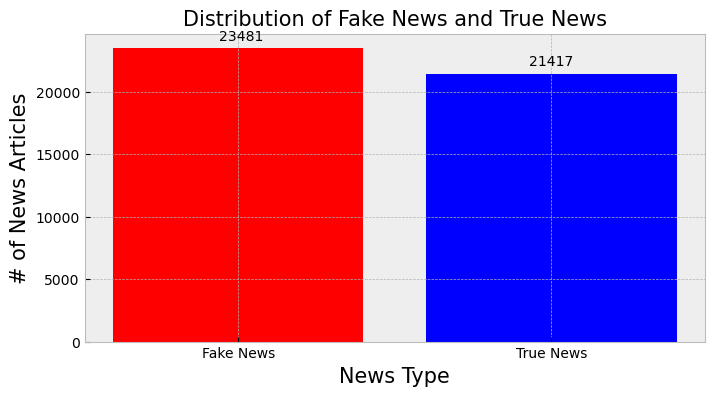

In [22]:
plt.figure(figsize=(8, 4))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('True News', len(true_df), color='blue')
plt.title('Distribution of Fake News and True News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.annotate(len(fake_df), # this is the text
                (0.01,23000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.annotate(len(true_df), # this is the text
                (1,21000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.show()

## Concatenating the title and text columns

In [23]:
fake_df['news'] = fake_df['title'] + fake_df['text']
fake_df['label'] = 0
fake_df.drop(['title','text'], axis=1, inplace=True)

In [24]:
true_df['news'] = true_df['title'] + true_df['text']
true_df['label'] = 1
true_df.drop(['title','text'], axis=1, inplace=True)

In [25]:
fake_df.sample(2)

,news,label
2121,Watch Trump Flat-Out Admit Trumpcare Will Rui...,0
18604,OUTRAGE! Student Threatens Violence Against Tr...,0


In [26]:
true_df.sample(2)

,news,label
15541,"U.S., Turkey restart issuing visas but tension...",1
3757,UK punters back an early exit for Trump: bookm...,1


## Visualizing the news using wordcloud

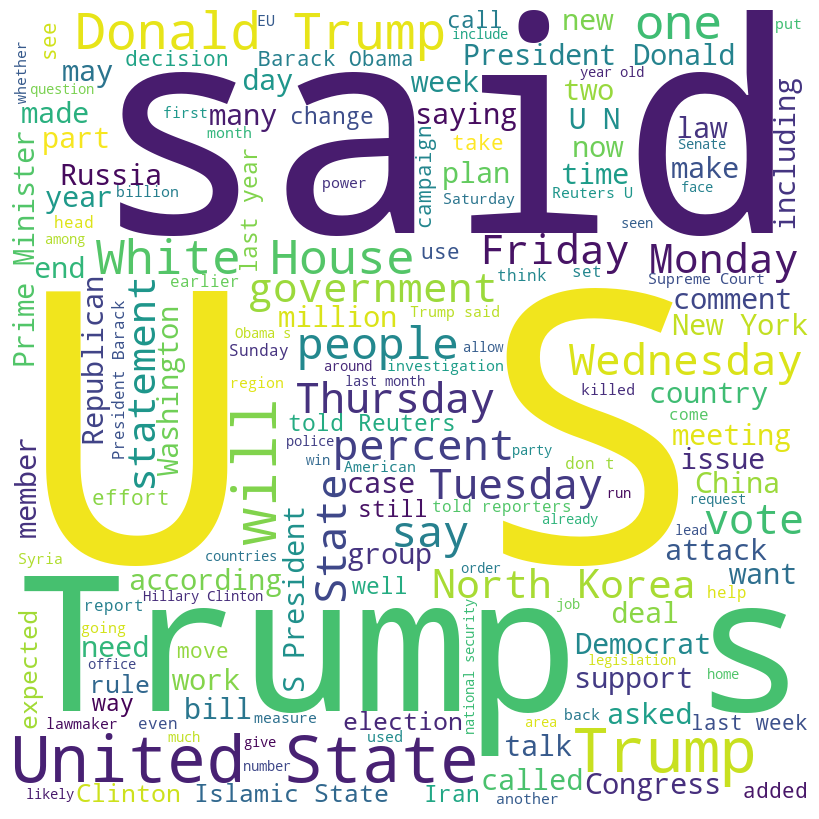

In [30]:
stopwords = set(STOPWORDS) 

words_li_true = list(true_df['news'])
string_of_words_true = " ".join(words_li_true)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_true) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

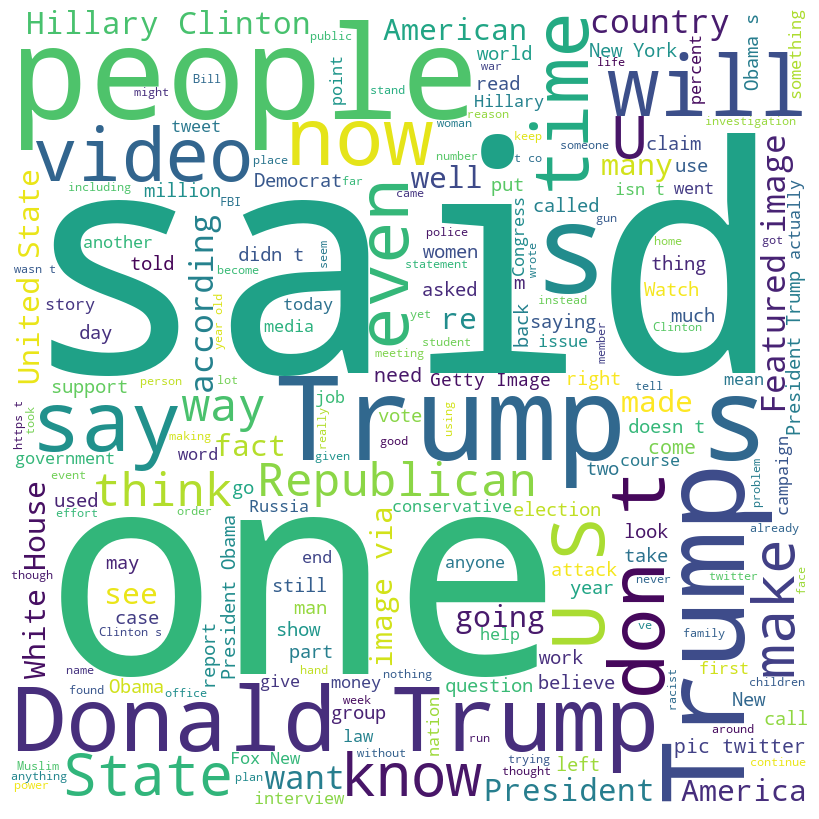

In [28]:
words_li_fake = list(fake_df['news'])
string_of_words_fake = " ".join(words_li_fake)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_fake) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Concatenating the true and fake news datasets

In [31]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [32]:
df.sample(5)

,news,label
41541,Syrian army encircles IS in al-Mayadin: Syrian...,1
2760,BUSTED: Trump’s Education Nominee Plagiarized...,0
29568,"Trump pulls U.S. out of Pacific trade deal, lo...",1
32717,Trump vice presidential search narrowed to fou...,1
14149,HOLY MUSLIM INDOCTRINATION! Sesame Street Intr...,0


## Using NLP to pre-process the news text

In [33]:
stop_words = nltk.corpus.stopwords.words('english')

In [34]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #stemming
        
    df.loc[index,'news'] = filter_sentence

In [35]:
df.sample(5)

,news,label
27868,turkey call assads ouster say support us miss...,1
43311,factbox what trump said united nationswashing...,1
15118,goodbye hillary here comes dumb and dumbercan...,0
40551,nz green party leader talk labourled coalitio...,1
939,city of chicago just told trump to go fck him...,0


In [36]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['news'])
freq_term_matrix = count_vectorizer.transform(df['news'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

## Splitting the dataset into test and train

In [37]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['label'], random_state=0)

## Logistic Regression

In [39]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [40]:
predictions_lr=logistic_regression.predict(X_test)

print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n\n")

accuracy_logistic = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

LOGISTIC REGRESSION: PERFORMANCE METRICS


Accuracy: 98.80%
Precision: 98.69%
F1 Score: 98.74%
Recall: 98.78%



Confusion matrix, without normalization
[[5806   70]
 [  65 5284]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


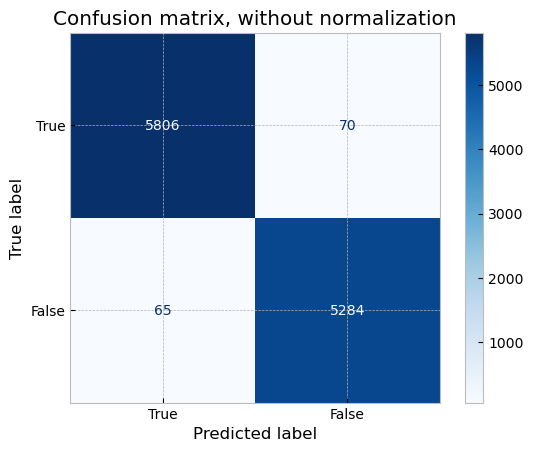

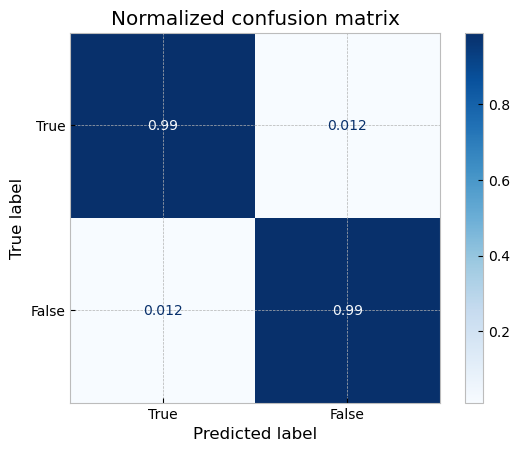

In [41]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## ADA

In [50]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train ADABoost Classifier
ada_classifier = abc.fit(X_train, y_train)

In [51]:
#Predict the response for test dataset
predictions_ada = ada_classifier.predict(X_test)

print("ADA BOOST CLASSIFIER: PERFORMANCE METRICS\n\n")

accuracy_ada = accuracy_score(y_test, predictions_ada)
print("Accuracy: %.2f%%" % (accuracy_ada * 100.0))

precision_ada = precision_score(y_test, predictions_ada, average=None)
print("Precision: %.2f%%" % (precision_ada[1] * 100.0))

f1score_ada = f1_score(y_test, predictions_ada, average=None)
print("F1 Score: %.2f%%" % (f1score_ada[1] * 100.0))

recall_ada = recall_score(y_test, predictions_ada, average=None)
print("Recall: %.2f%%" % (recall_ada[1] * 100.0))

ADA BOOST CLASSIFIER: PERFORMANCE METRICS


Accuracy: 98.82%
Precision: 98.77%
F1 Score: 98.77%
Recall: 98.77%


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix, without normalization
[[5810   66]
 [  66 5283]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


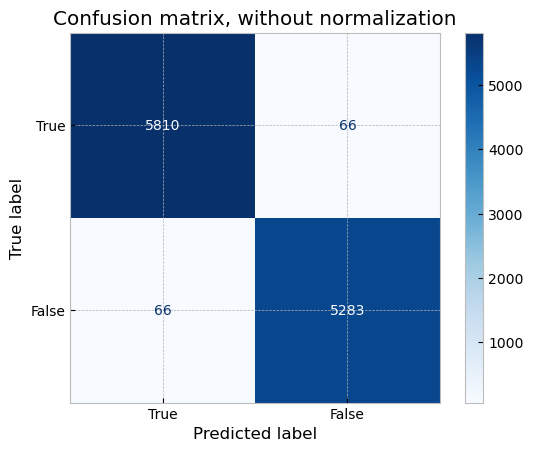

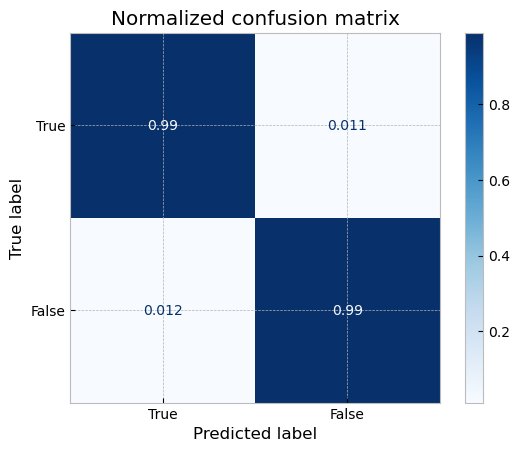

In [52]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ada_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## XGBoost

In [57]:
xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
predictions_xgb = xgb_classifier.predict(X_test)
predictions_xgbf = [round(value) for value in predictions_xgb]
# evaluate predictions

print("XG BOOST: PERFORMANCE METRICS\n\n")

accuracy_xgb = accuracy_score(y_test, predictions_xgbf)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

precision_xgb = precision_score(y_test, predictions_xgbf, average=None)
print("Precision: %.2f%%" % (precision_xgb[1] * 100.0))

f1score_xgb = f1_score(y_test, predictions_xgbf, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb[1] * 100.0))

recall_xgb = recall_score(y_test, predictions_xgbf, average=None)
print("Recall: %.2f%%" % (recall_xgb[1] * 100.0))

XG BOOST: PERFORMANCE METRICS


Accuracy: 99.55%
Precision: 99.64%
F1 Score: 99.52%
Recall: 99.40%


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Confusion matrix, without normalization
[[5857   19]
 [  32 5317]]

Normalized confusion matrix
[[1.   0.  ]
 [0.01 0.99]]


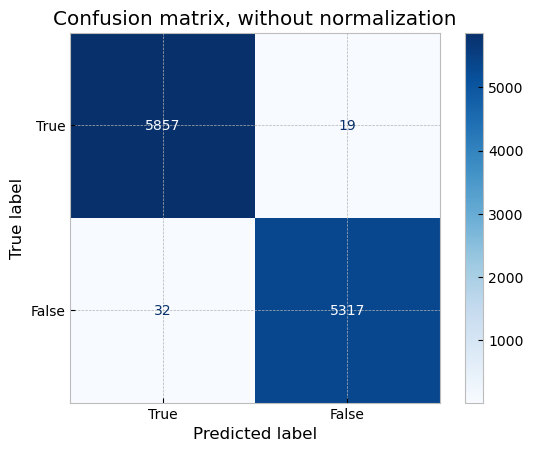

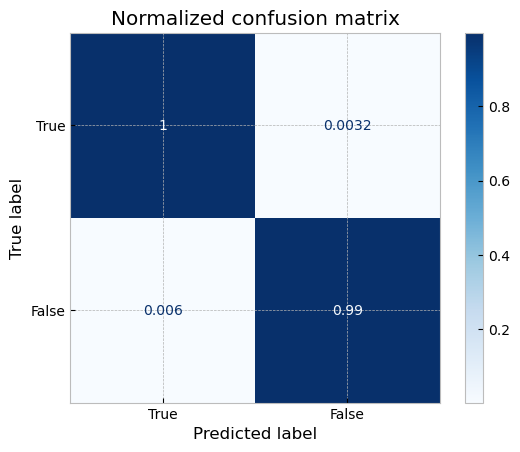

In [59]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest

In [60]:
# Instantiate model with 30 decision trees
rf = RandomForestClassifier(n_estimators = 30)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [61]:
# make predictions for test data
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]

print("RANDOM FOREST: PERFORMANCE METRICS\n\n")

accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

precision_rf = precision_score(y_test, predictions_rf, average=None)
print("Precision: %.2f%%" % (precision_rf[1] * 100.0))

f1score_rf = f1_score(y_test, predictions_rf, average=None)
print("F1 Score: %.2f%%" % (f1score_rf[1] * 100.0))

recall_rf = recall_score(y_test, predictions_rf, average=None)
print("Recall: %.2f%%" % (recall_rf[1] * 100.0))

RANDOM FOREST: PERFORMANCE METRICS


Accuracy: 98.05%
Precision: 98.21%
F1 Score: 97.95%
Recall: 97.68%


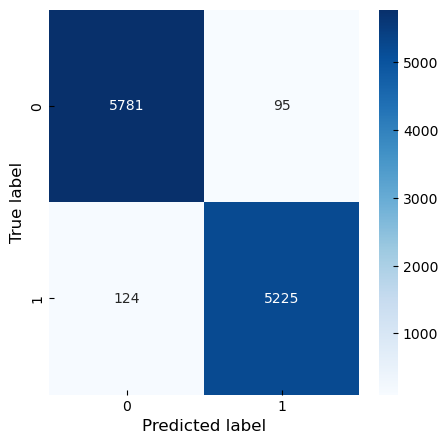

In [62]:
cm = confusion_matrix(y_test, predictions_rf)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt =".0f", ax=ax,cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [63]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[5781   95]
 [ 124 5225]]


## Naive Bayes

In [64]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
naive_classifier = Naive.fit(X_train,y_train)

In [65]:
# make predictions for test data
predictions_NB = Naive.predict(X_test)

print("NAIVE BAYES: PERFORMANCE METRICS\n\n")

accuracy_nb = accuracy_score(y_test, predictions_NB)
print("Accuracy: %.2f%%" % (accuracy_nb * 100.0))

precision_nb = precision_score(y_test, predictions_NB, average=None)
print("Precision: %.2f%%" % (precision_nb[1] * 100.0))

f1score_nb = f1_score(y_test, predictions_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_nb[1] * 100.0))

recall_nb = recall_score(y_test, predictions_NB, average=None)
print("Recall: %.2f%%" % (recall_nb[1] * 100.0))

NAIVE BAYES: PERFORMANCE METRICS


Accuracy: 95.23%
Precision: 95.11%
F1 Score: 94.99%
Recall: 94.88%



Confusion matrix, without normalization
[[5615  261]
 [ 274 5075]]

Normalized confusion matrix
[[0.96 0.04]
 [0.05 0.95]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


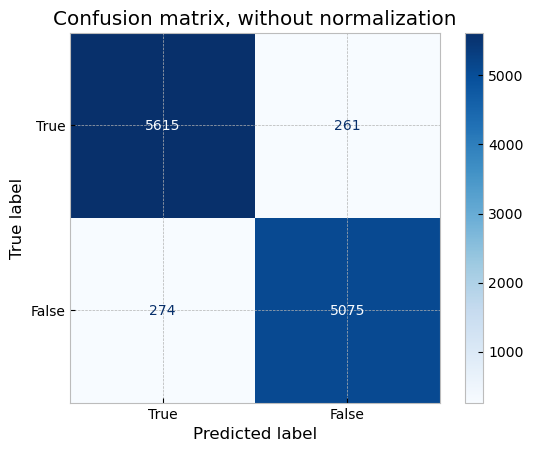

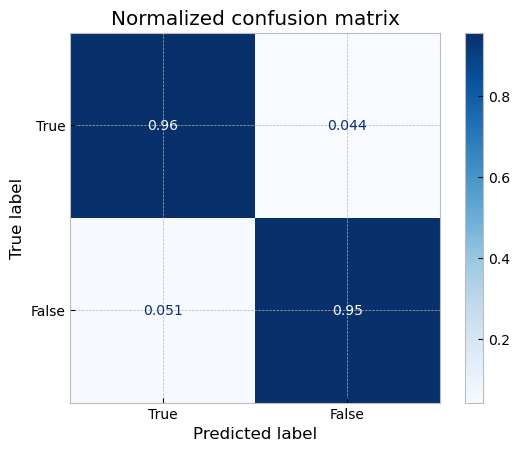

In [66]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Decision Tree

In [67]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train,y_train)

In [68]:
# make predictions for test data
predictions_dt = dt_clf.predict(X_test)

print("DECISION TREE: PERFORMANCE METRICS\n\n")

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

precision_dt = precision_score(y_test, predictions_dt, average=None)
print("Precision: %.2f%%" % (precision_dt[1] * 100.0))

f1score_dt = f1_score(y_test, predictions_dt, average=None)
print("F1 Score: %.2f%%" % (f1score_dt[1] * 100.0))

recall_dt = recall_score(y_test, predictions_dt, average=None)
print("Recall: %.2f%%" % (recall_dt[1] * 100.0))

DECISION TREE: PERFORMANCE METRICS


Accuracy: 98.60%
Precision: 98.67%
F1 Score: 98.53%
Recall: 98.39%



Confusion matrix, without normalization
[[5805   71]
 [  86 5263]]

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


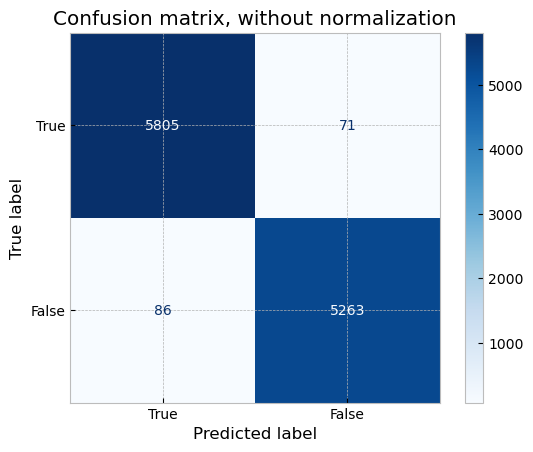

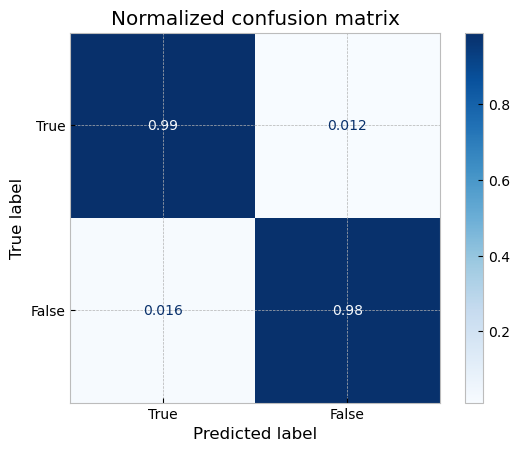

In [69]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## RNN

In [70]:
#normalizing the textual data
import re

def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

df['news'] = normalize(df['news'])

#after normalizing
df.sample(5)

,news,label
38905,catalan secessionist party fail agree unity ti...,1
35297,russia detains norwegian citizen suspected spy...,1
6738,fact superdelegates have never determined the ...,0
24155,can i get go canadas trudeau charm manila orde...,1
15679,nyc mayor deblasio says something changing ame...,0


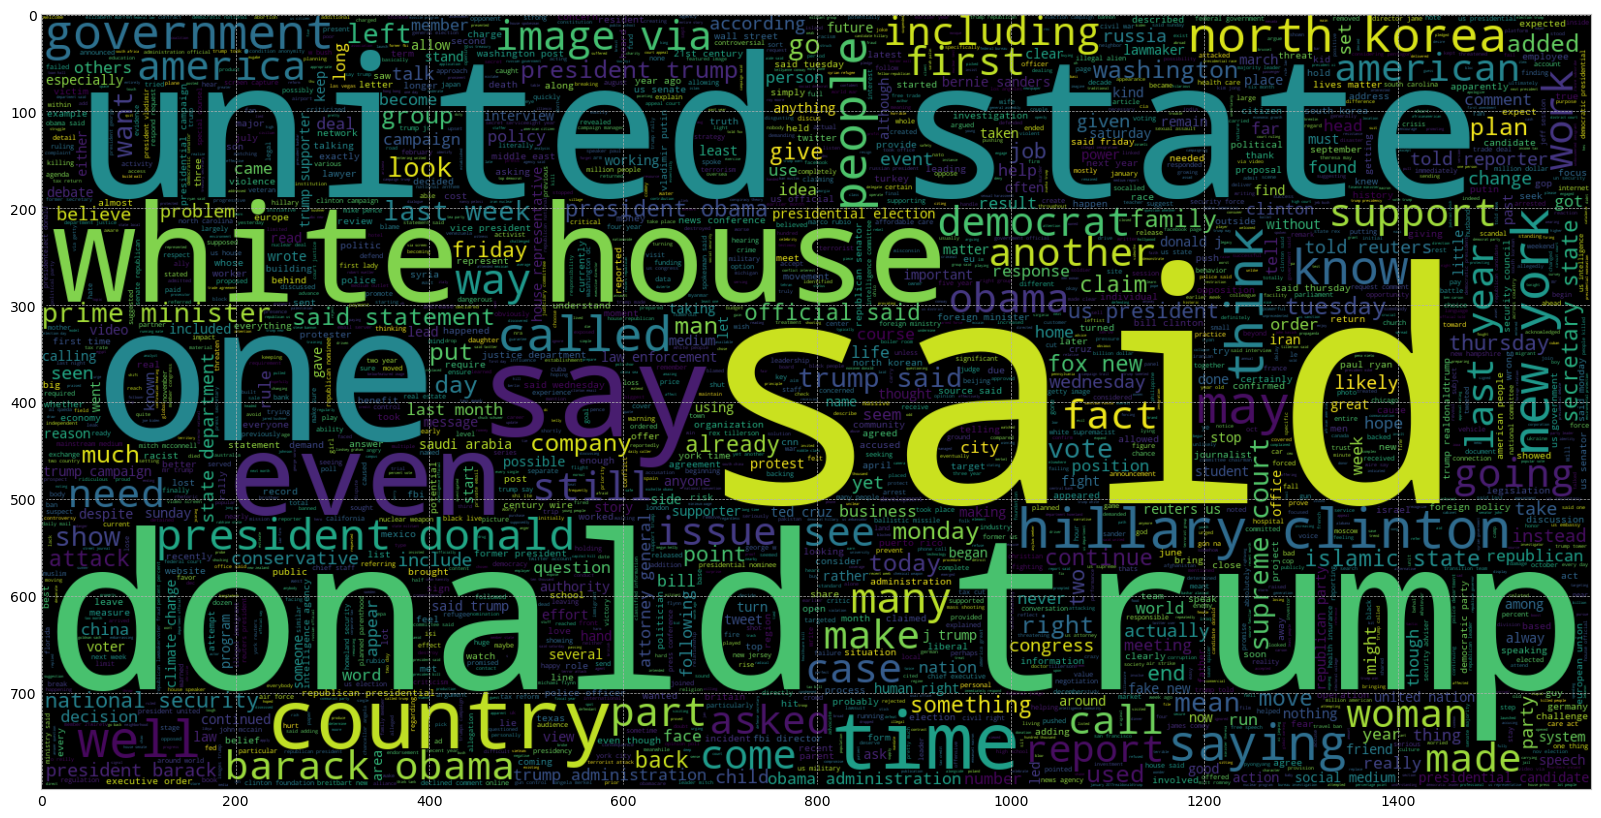

In [71]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.news))
plt.imshow(wc , interpolation = 'bilinear')

In [72]:
feature = df['news']
target = df['label']

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(feature, target, test_size=0.20, random_state=18)

In [73]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_rnn)

In [74]:
x_train_rnn = tokenizer.texts_to_sequences(x_train_rnn)
x_test_rnn = tokenizer.texts_to_sequences(x_test_rnn)

In [75]:
x_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_train_rnn, padding='post', maxlen=256)
x_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_test_rnn, padding='post', maxlen=256)

In [76]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [77]:
model_rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model_rnn.fit(x_train_rnn, y_train_rnn, epochs=10,validation_split=0.1, batch_size=30, shuffle=True,) 

D:\Anaconda\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/10
1078/1078 [==============================] - 107s 94ms/step - loss: 0.2151 - accuracy: 0.8981 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 2/10
1078/1078 [==============================] - 99s 92ms/step - loss: 0.0359 - accuracy: 0.9915 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 3/10
1078/1078 [==============================] - 98s 90ms/step - loss: 0.0196 - accuracy: 0.9958 - val_loss: 0.0348 - val_accuracy: 0.9916
Epoch 4/10
1078/1078 [==============================] - 102s 95ms/step - loss: 0.0157 - accuracy: 0.9963 - val_loss: 0.0493 - val_accuracy: 0.9891
Epoch 5/10
1078/1078 [==============================] - 99s 92ms/step - loss: 0.0087 - accuracy: 0.9983 - val_loss: 0.0302 - val_accuracy: 0.9925
Epoch 6/10
1078/1078 [==============================] - 98s 91ms/step - loss: 0.0088 - accuracy: 0.9981 - val_loss: 0.0397 - val_accuracy: 0.9875
Epoch 7/10
1078/1078 [==============================] - 99s 92ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0483

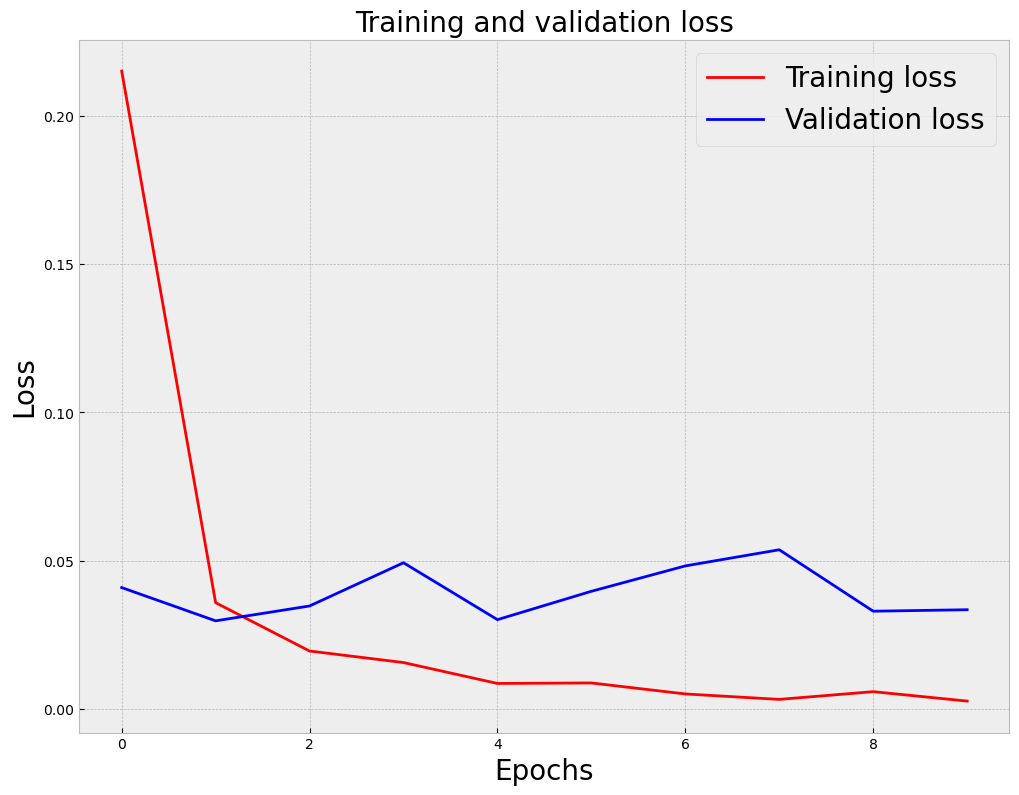

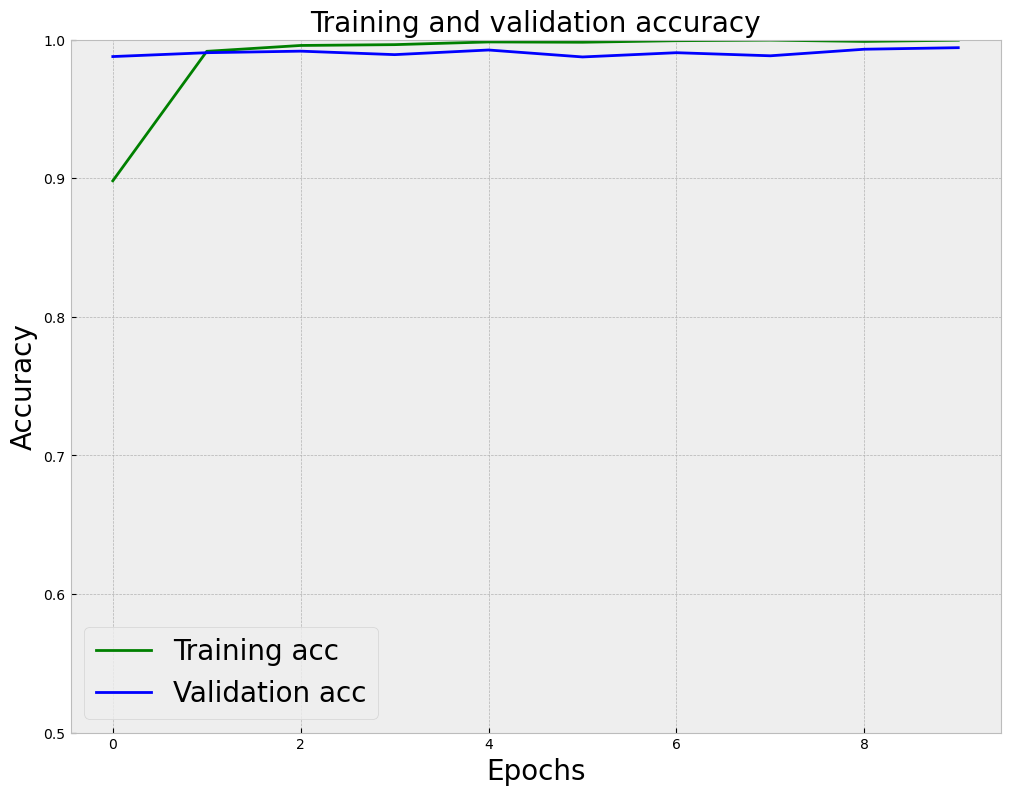

In [78]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [79]:
model_rnn.evaluate(x_test_rnn, y_test_rnn)

281/281 [==============================] - 8s 27ms/step - loss: 0.0359 - accuracy: 0.9929


[0.035933177918195724, 0.9928730726242065]

In [80]:
pred = model_rnn.predict(x_test_rnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

281/281 [==============================] - 8s 26ms/step


In [81]:
print("RNN: PERFORMANCE METRICS\n\n")

accuracy_rnn = accuracy_score(y_test_rnn, binary_predictions)
print("Accuracy: %.2f%%" % (accuracy_rnn * 100.0))

precision_rnn = precision_score(y_test_rnn, binary_predictions, average=None)
print("Precision: %.2f%%" % (precision_rnn[1] * 100.0))

f1score_rnn = f1_score(y_test_rnn, binary_predictions, average=None)
print("F1 Score: %.2f%%" % (f1score_rnn[1] * 100.0))

recall_rnn = recall_score(y_test_rnn, binary_predictions, average=None)
print("Recall: %.2f%%" % (recall_rnn[1] * 100.0))

RNN: PERFORMANCE METRICS


Accuracy: 99.29%
Precision: 99.58%
F1 Score: 99.26%
Recall: 98.93%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

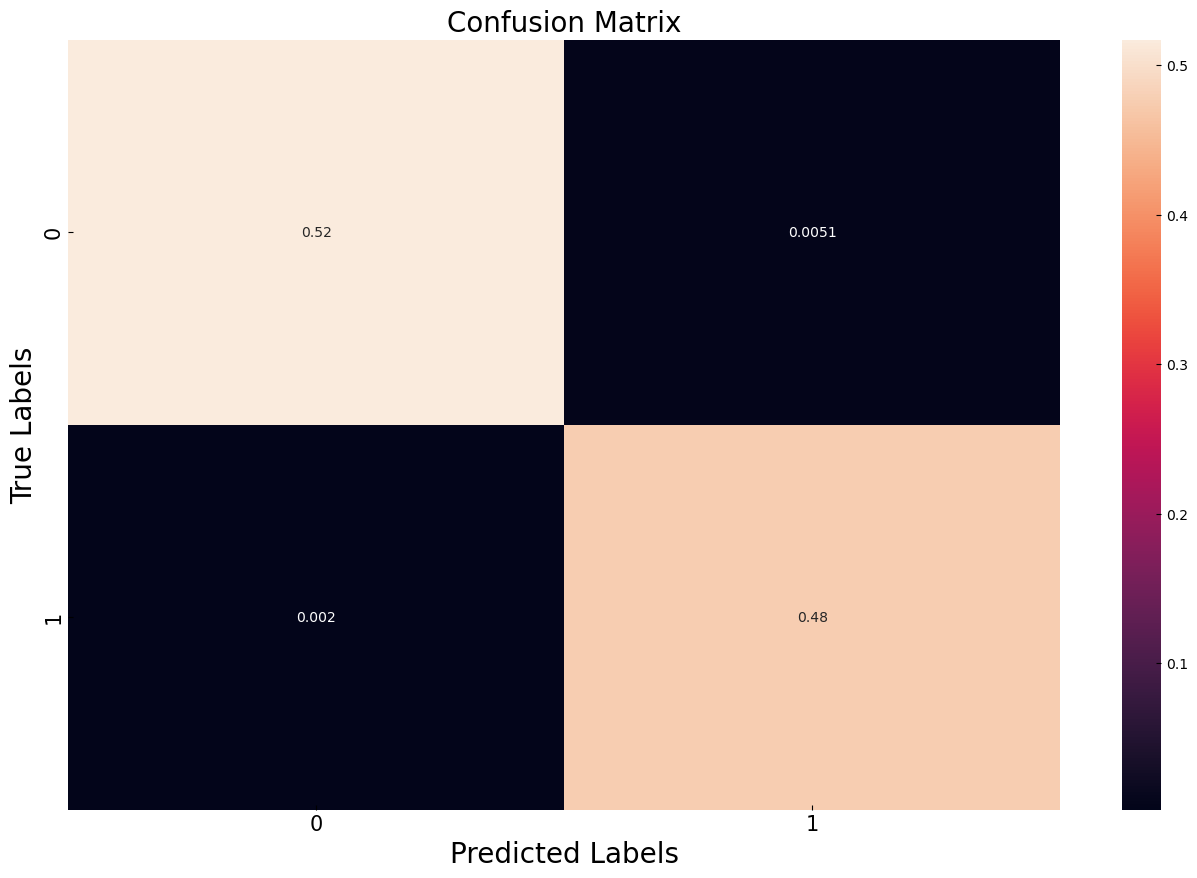

In [82]:
matrix = confusion_matrix(binary_predictions, y_test_rnn, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

In [83]:
print("Confusion Matrix")
print(matrix)

Confusion Matrix
[[0.52 0.01]
 [0.   0.48]]


## Comparing the models w.r.t. performance

In [85]:
var_models = ['Logstic Regression', 'ADA', 'XGB','RF','Naive Bayes','DT','RNN']

var_accuracy = [accuracy_logistic,accuracy_ada,accuracy_xgb,accuracy_rf,accuracy_nb,accuracy_dt,accuracy_rnn]
var_precision = [precision_logistic[1],precision_ada[1],precision_xgb[1],precision_rf[1],precision_nb[1],precision_dt[1],precision_rnn[1]]
var_f1score = [f1score_logistic[1],f1score_ada[1],f1score_xgb[1],f1score_rf[1],f1score_nb[1],f1score_dt[1],f1score_rnn[1]]
var_recall = [recall_logistic[1],recall_ada[1],recall_xgb[1],recall_rf[1],recall_nb[1],recall_dt[1],recall_rnn[1]]

In [86]:

metrics = pd.DataFrame({'Models': var_models,'Accuracy': var_accuracy,'Precision': var_precision, 'F1 Score': var_f1score, 'Recall':var_recall})

print("Table of Comparison:\n\n")
metrics 

Table of Comparison:




,Models,Accuracy,Precision,F1 Score,Recall
0,Logstic Regression,0.987973,0.986926,0.987387,0.987848
1,ADA,0.988241,0.987661,0.987661,0.987661
2,XGB,0.995457,0.996439,0.995227,0.994018
3,RF,0.980490,0.982143,0.979473,0.976818
4,Naive Bayes,0.952339,0.951087,0.949930,0.948775
5,DT,0.986013,0.986689,0.985304,0.983922
6,RNN,0.992873,0.995804,0.992565,0.989347


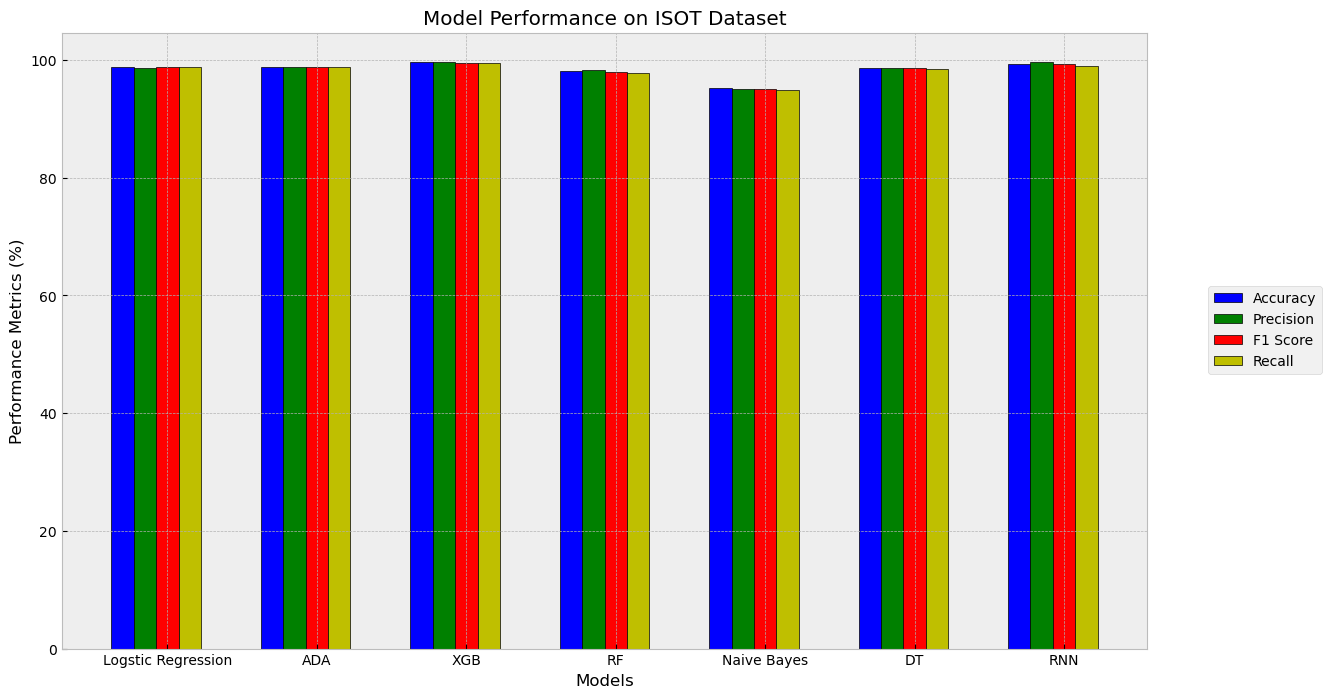

In [87]:
plt.figure(figsize=(14,8))
n= len(var_models)
r = np.arange(n)
width = 0.15

plt.bar(r, [i*100 for i in var_accuracy], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in var_precision], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*2,  [i*100 for i in var_f1score], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')
plt.bar(r + width*3,  [i*100 for i in var_recall], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Model Performance on ISOT Dataset")

plt.xticks(r + width*2,var_models)
plt.legend(bbox_to_anchor = (1.05, 0.6))
  
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods

<Figure size 1400x1000 with 0 Axes>

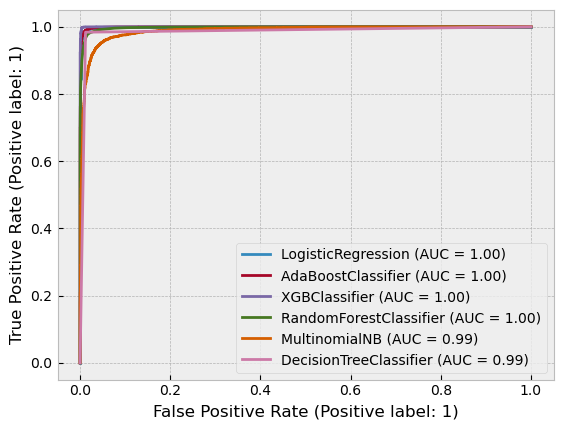

In [90]:
#plotting the roc curve
plt.figure(figsize=(14,10))
disp = plot_roc_curve(logistic_regression,X_test,y_test)
plot_roc_curve(ada_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(naive_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt_clf,X_test,y_test,ax=disp.ax_)
plt.show()